In [71]:
import qiskit
import numpy as np
import sys
sys.path.insert(1, '../')
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.fubini_study, qtm.encoding
import importlib
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_1qubit)
importlib.reload(qtm.qtm_nqubit)
importlib.reload(qtm.fubini_study)

<module 'qtm.fubini_study' from '..\\qtm\\fubini_study.py'>

[1.  1.2 1.4 1.6 1.8]
[2.  2.2 2.4 2.6]
[2.8 3.  3.2 3.4]
[3.6 3.8 4.  4.2]
[4.4 4.6 4.8 5. ]
[5.2 5.4 5.6 5.8 6. ]
[6.2 6.4 6.6 6.8]
[7.  7.2 7.4 7.6]
[7.8 8.  8.2 8.4]
[8.6 8.8 9.  9.2]


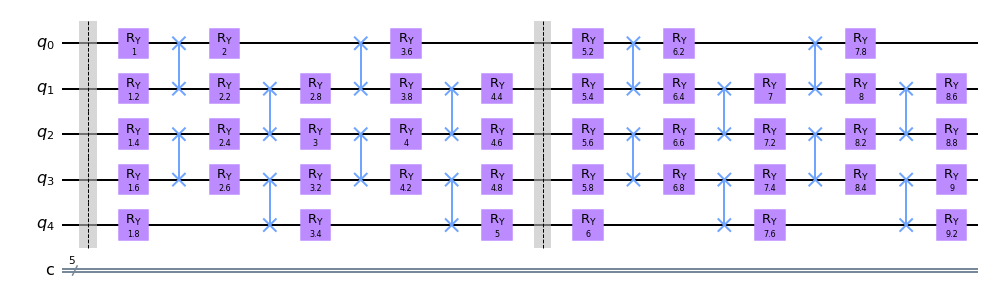

In [72]:
num_qubits = 3
num_layers = 1
qc = qiskit.QuantumCircuit(num_qubits)
thetas = np.ones((num_qubits*5 - 4)*num_layers)


theta = np.pi/3
thetas = np.ones(num_qubits*num_layers*5)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values_ghz = []
thetass_ghz = []
for i in range(0, 400):
    # fubini_study for binho_state is same for koczor state
    if i % 20 == 0:
        print('GHZ (' + str(num_layers) + ' layer): ', i)
    G = qtm.fubini_study.calculate_binho_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_GHZchecker_binho,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.qtm_nqubit.create_GHZchecker_binho(qc.copy(), thetas, num_layers, theta)  
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_ghz.append(loss)
    thetass_ghz.append(thetas)
traces_ghz, fidelities_ghz = [], []
for thetas in thetass_ghz:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_binho_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.qtm_nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_ghz.append(trace)
    fidelities_ghz.append(fidelity)
    # Plot loss value in 100 steps
print('Writting ...')

np.savetxt("../../experiments/binho_ansatz_15layer/" + str(num_layers) + "/loss_values_ghz.csv", loss_values_ghz, delimiter=",")
np.savetxt("../../experiments/binho_ansatz_15layer/" + str(num_layers) + "/thetass_ghz.csv", thetass_ghz, delimiter=",")
np.savetxt("../../experiments/binho_ansatz_15layer/" + str(num_layers) + "/traces_ghz.csv", traces_ghz, delimiter=",")
np.savetxt("../../experiments/binho_ansatz_15layer/" + str(num_layers) + "/fidelities_ghz.csv", fidelities_ghz, delimiter=",")

